# Proyek Analisis Data: [Bike]
- **Nama:** [Rahmalia Nurhalissa]
- **Email:** [m121d4kx2479@bangkit.academy]
- **ID Dicoding:** [lissa0999]

## Pertanyaan Bisnis

1. Berapa jumlah sepeda yang disewa pada hari libur dan hari kerja di tahun 2011?
2. Pada musim apakah jumlah sepeda banyak disewa? dan berapa jumlah sewanya?
3. Apa hubungan suhu dengan jumlah pengguna yang terdaftar?


## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install matplotlib


In [ ]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


In [ ]:
#library
import pandas as pd
import plotly
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot



menghubungkan data ke gdrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
dataset_hour = pd.read_csv("/content/drive/My Drive/datacsv/hour.csv")
dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")
dataset_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data



*   Missing value






In [ ]:
print('Dataframe dataset_day:')
print(dataset_day.isnull().sum())

print('\nDataframe dataset_hour:')
print(dataset_hour.isnull().sum())

Dataframe dataset_day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe dataset_hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Kesimpulan : Pada assesing data, di missing value, tidak ditemukan data yang hilang pada dataset day maupun hour



*   Duplicate value



In [ ]:
value_day = 'Dataframe dataset_day:', dataset_day.duplicated().sum()
value_hour = 'Dataframe dataset_hour', dataset_hour.duplicated().sum()
print(value_day)
print(value_hour)

('Dataframe dataset_day:', 0)
('Dataframe dataset_hour', 0)


Pada dua data tersebut tidak ditemukan duplikasi

### Cleaning Data

Pada cleaning data, karena data tidak terindikasi missing values dan duplicate maka dari itu saya hanya merapikan data dengan mengubah nama variabel agar bisa dibaca dengan baik

In [ ]:
dataset_day.rename(columns={'instant' : 'input',
                            'dteday' : 'tanggal',
                            'season' : 'musim',
                            'yr' : 'tahun',
                            'mnth' : 'bulan',
                            'holiday' : 'liburan',
                            'weekday' : 'hari_biasa',
                            'workingday' : 'hari_kerja',
                            'weathersit' : 'kondisi_cuaca',
                            'temp' : 'temperature',
                            'atemp' : 'feeling_temperature',
                            'hum' : 'kelembapan_udara',
                            'windspeed' : 'kecepatan_angin',
                            'casual' : 'cust_casual',
                            'registered' : 'cust_terdaftar',
                            'cnt' : 'total rental'}, inplace=True)
dataset_day.head()

,input,tanggal,musim,tahun,bulan,liburan,hari_biasa,hari_kerja,kondisi_cuaca,temperature,feeling_temperature,kelembapan_udara,kecepatan_angin,cust_casual,cust_terdaftar,total rental
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
dataset_hour.rename(columns={'instant' : 'input',
                            'dteday' : 'tanggal',
                            'season' : 'musim',
                            'yr' : 'tahun',
                            'mnth' : 'bulan',
                            'holiday' : 'liburan',
                            'weekday' : 'hari_biasa',
                            'workingday' : 'hari_kerja',
                            'weathersit' : 'kondisi_cuaca',
                            'temp' : 'temperature',
                            'atemp' : 'feeling_temperature',
                            'hum' : 'kelembapan_udara',
                            'windspeed' : 'kecepatan_angin',
                            'casual' : 'cust_casual',
                            'registered' : 'cust_terdaftar',
                            'cnt' : 'total rental', 'hr' : 'jam'}, inplace=True)
dataset_hour.head()

,input,tanggal,musim,tahun,bulan,jam,liburan,hari_biasa,hari_kerja,kondisi_cuaca,temperature,feeling_temperature,kelembapan_udara,kecepatan_angin,cust_casual,cust_terdaftar,total rental
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)



*   eksplorasi data cust




In [ ]:
dataset_day.describe(include="all")
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_type
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,weekend
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,weekday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,weekday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,weekday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,weekday




*   Distribusi jumlah sewa sepeda pada hari kerja selama setahun





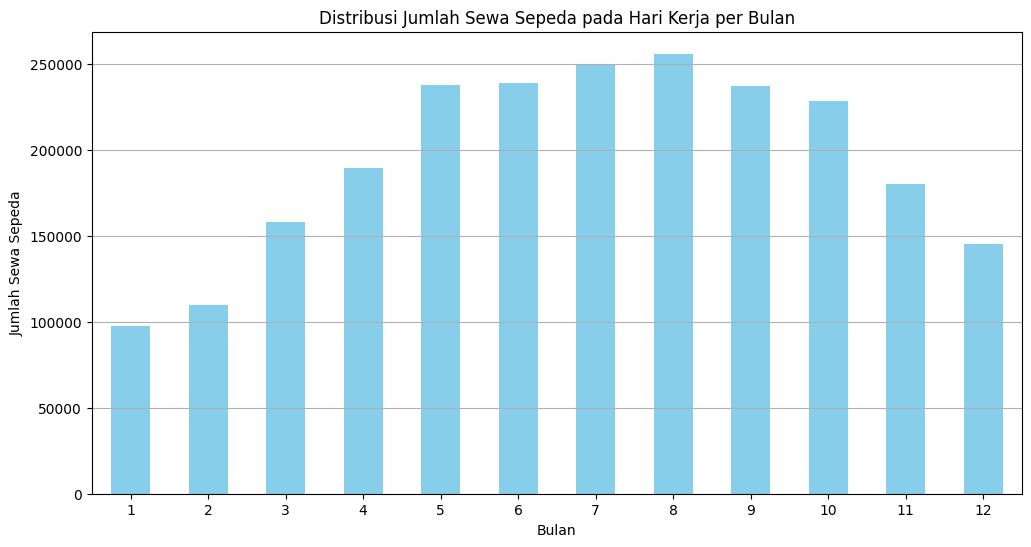

In [ ]:

dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")
dataset_day['day_type'] = dataset_day['weekday'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

weekday_data = dataset_day[dataset_day['day_type'] == 'weekday']

plt.figure(figsize=(12, 6))
weekday_data.groupby('mnth')['cnt'].sum().plot(kind='bar', color='skyblue')
plt.title('Distribusi Jumlah Sewa Sepeda pada Hari Kerja per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Pada grafik diatas dapat disimpulkan bahwa, berdasarkan hari kerja jumlah sewa sepeda terbanyak pada tahun 2011 ada pada bulan agustus > 250000



*   Distribusi Jumlah sewa sepeda pada hari libur per bulan



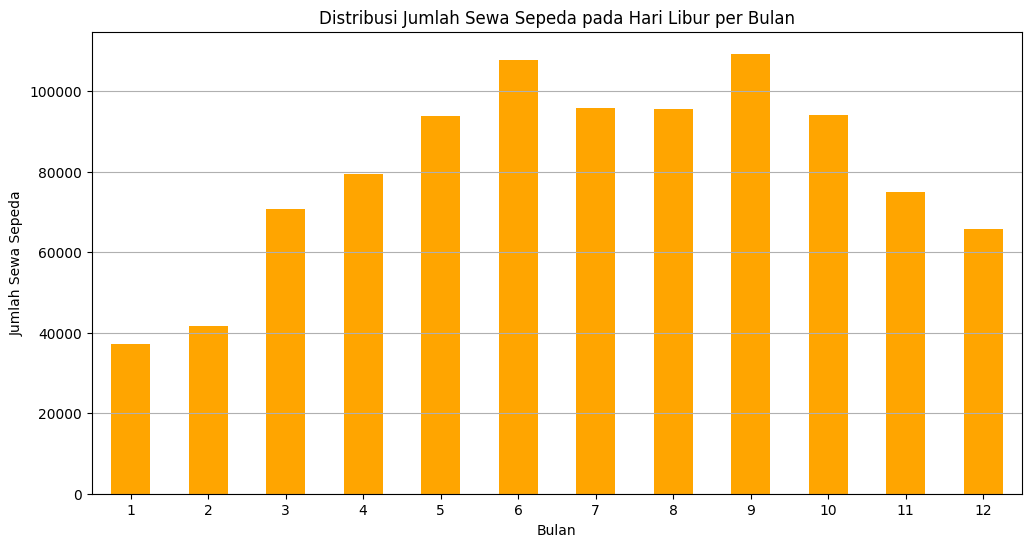

In [ ]:

dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")
dataset_day['day_type'] = dataset_day['weekday'].apply(lambda x: 'weekday' if x < 5 else 'weekend')
weekend_data = dataset_day[dataset_day['day_type'] == 'weekend']
plt.figure(figsize=(12, 6))
weekend_data.groupby('mnth')['cnt'].sum().plot(kind='bar', color='orange')
plt.title('Distribusi Jumlah Sewa Sepeda pada Hari Libur per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Berdasarkan hari libur pada tahun 2011, distribusi jumlah sewa sepeda mendapatkan angka paling banyak sebesar > 100.000 pada bulan juni dan september



*   Distribusi jumlah sewa sepeda berdasarkan musim disetiap bulannya

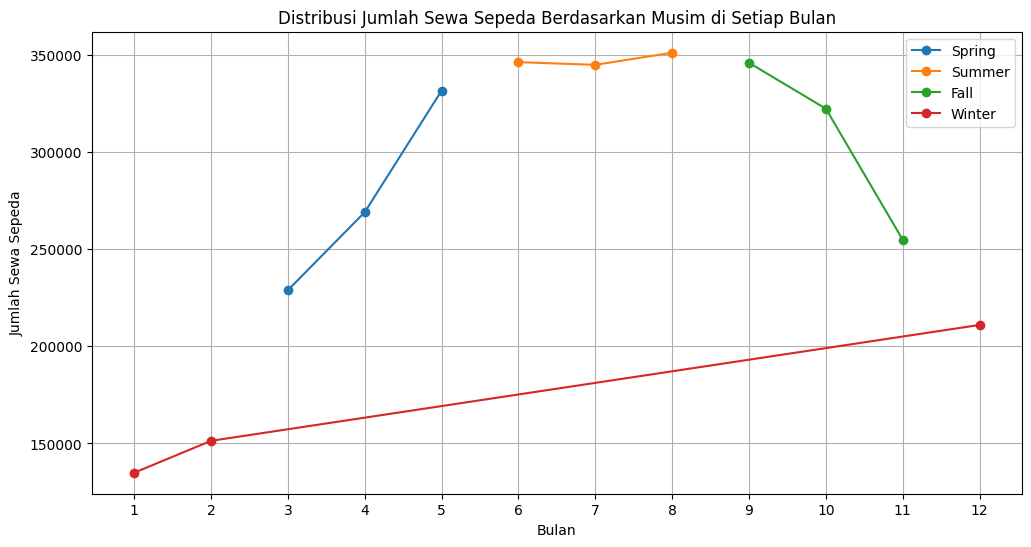

In [ ]:
dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
dataset_day['season'] = dataset_day['mnth'].map(season_mapping)
plt.figure(figsize=(12, 6))
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
for season in season_order:
    season_data = dataset_day[dataset_day['season'] == season]
    season_data.groupby('mnth')['cnt'].sum().plot(kind='line', marker='o', label=season)
plt.title('Distribusi Jumlah Sewa Sepeda Berdasarkan Musim di Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


Selama setahun terjadi empat musim yang mempengaruhi jumlah persewaan sepeda disetiap musimnya, di awal bulan pada musim dingin mengalami kenaikan sebesar 15000, setelah itu tepat di bulan ketiga musim spring jumlah penyewa sepeda mengalami kenaikan hingga di bulan juni pada musim summer, musim summer merupakan musim yang paling banyak jumlah customer menyewa sepeda, setelah itu mulai turun di bulan november dimana pada bulan itu, merupakan transisi dari musim fall ke winter.



*   Distribusi jumlah sewa sepeda dengan cuaca setiap bulannya


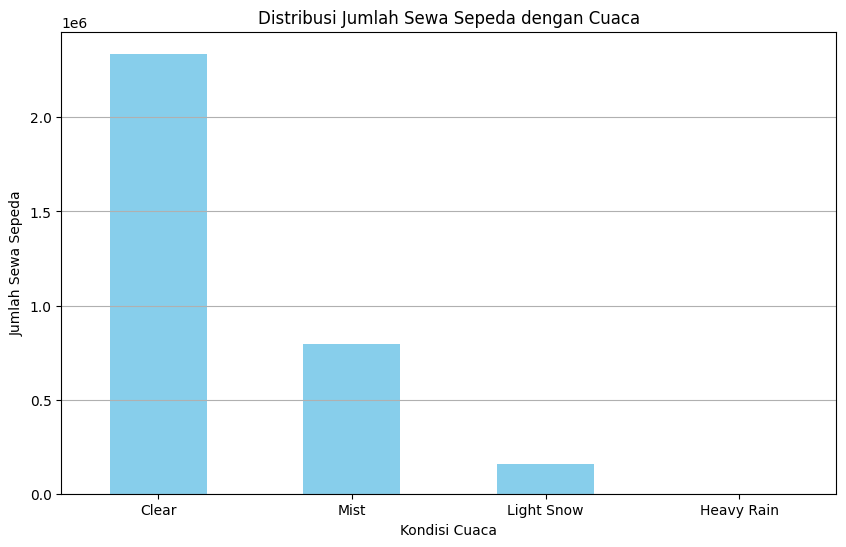

In [ ]:
dataset_hour = pd.read_csv("/content/drive/My Drive/datacsv/hour.csv")

plt.figure(figsize=(10, 6))
weather_counts = dataset_hour.groupby('weathersit')['cnt'].sum()
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Jumlah Sewa Sepeda dengan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(rotation=0, ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'])
plt.grid(axis='y')
plt.show()




*   Distribusi jumlah sewa sepeda dengan suhu selama setahun


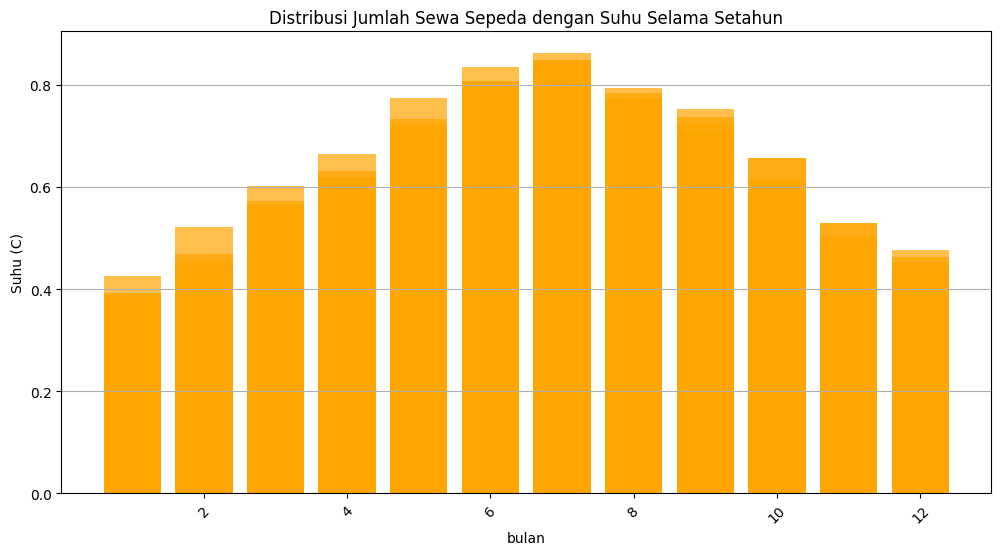

In [ ]:
dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")

plt.figure(figsize=(12, 6))
plt.bar(dataset_day['mnth'], dataset_day['temp'], color='orange', alpha=0.7)
plt.title('Distribusi Jumlah Sewa Sepeda dengan Suhu Selama Setahun')
plt.xlabel('bulan')
plt.ylabel('Suhu (C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




*   Ramalan distribusi kenaikan jumlah sewa di tahun berikutnya berdasarkan musimnya



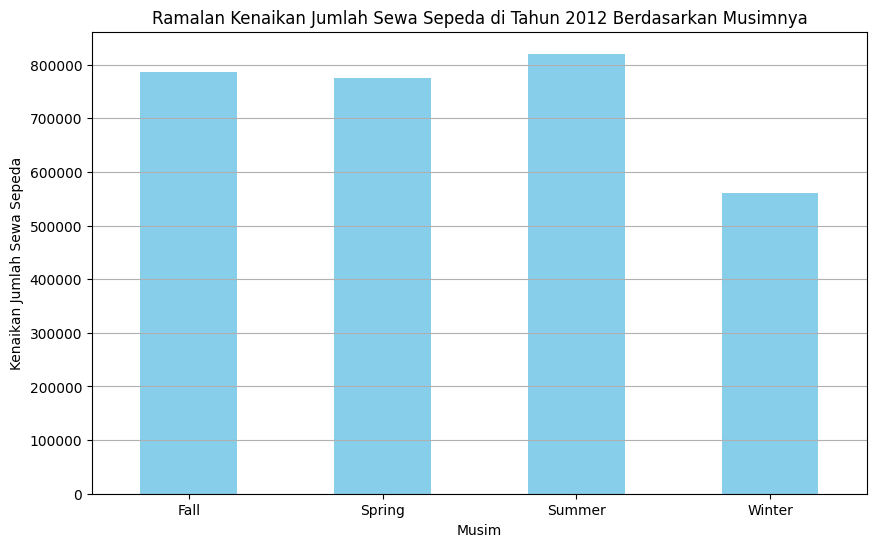

In [ ]:

dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")

season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
dataset_day['season'] = dataset_day['mnth'].map(season_mapping)

data_2011 = dataset_day[(dataset_day['yr'] == 0) & (dataset_day['mnth'] != 12)]  # Hilangkan bulan Desember 2011 karena kami akan memprediksi kenaikan untuk tahun 2012
data_2012 = dataset_day[dataset_day['yr'] == 1]

total_bikes_rented_2011_per_season = data_2011.groupby('season')['cnt'].sum()
total_bikes_rented_2012_per_season = data_2012.groupby('season')['cnt'].sum()

increase_per_season = total_bikes_rented_2012_per_season - total_bikes_rented_2011_per_season

forecasted_increase_2012_per_season = total_bikes_rented_2012_per_season + increase_per_season
plt.figure(figsize=(10, 6))
forecasted_increase_2012_per_season.plot(kind='bar', color='skyblue')
plt.title('Ramalan Kenaikan Jumlah Sewa Sepeda di Tahun 2012 Berdasarkan Musimnya')
plt.xlabel('Musim')
plt.ylabel('Kenaikan Jumlah Sewa Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: berapa jumlah sepeda yang disewa pada hari kerja dan hari libur di tahun 2011?

Jumlah sepeda yang disewa pada hari kerja di tahun 2011: 856264
Jumlah sepeda yang disewa pada hari libur di tahun 2011: 30022


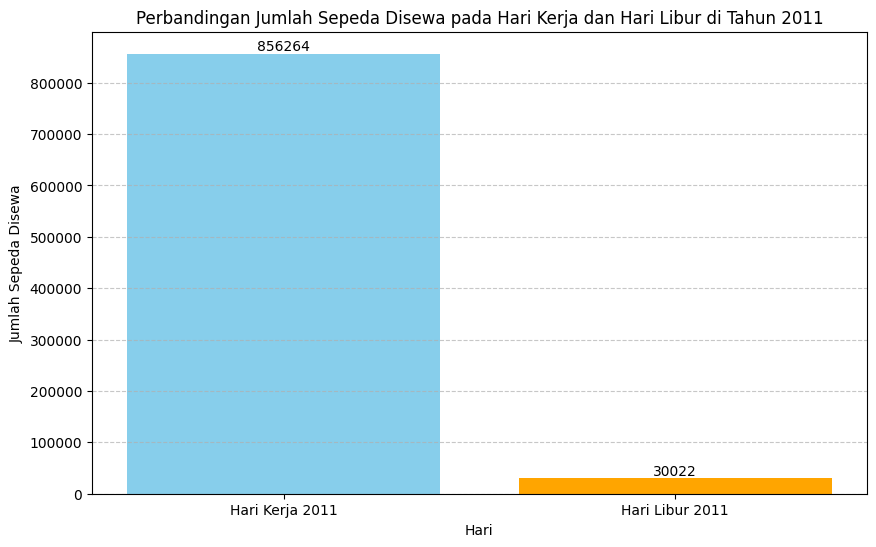

In [7]:
dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")
weekday_data_2011 = dataset_day[(dataset_day['yr'] == 0) &
                                (dataset_day['holiday'] == 0) &
                                (dataset_day['workingday'] == 1) &
                                (dataset_day['dteday'].str.startswith('2011'))]

holiday_data_2011 = dataset_day[(dataset_day['yr'] == 0) &
                                (dataset_day['holiday'] == 1) &
                                (dataset_day['dteday'].str.startswith('2011'))]

total_bikes_rented_weekday = weekday_data_2011['cnt'].sum()
total_bikes_rented_holiday = holiday_data_2011['cnt'].sum()

print("Jumlah sepeda yang disewa pada hari kerja di tahun 2011:", total_bikes_rented_weekday)
print("Jumlah sepeda yang disewa pada hari libur di tahun 2011:", total_bikes_rented_holiday)

plt.figure(figsize=(10, 6))

plt.bar(['Hari Kerja 2011', 'Hari Libur 2011'], [total_bikes_rented_weekday, total_bikes_rented_holiday], color=['skyblue', 'orange'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Perbandingan Jumlah Sepeda Disewa pada Hari Kerja dan Hari Libur di Tahun 2011')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate([total_bikes_rented_weekday, total_bikes_rented_holiday]):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


### Pertanyaan kedua  : Pada musim apakah jumlah sepeda banyak disewa? dan berapa jumlah sewanya?

Musim dengan jumlah sepeda yang banyak disewa: Summer
Jumlah sepeda yang disewa pada musim tersebut: 5665.673913043478


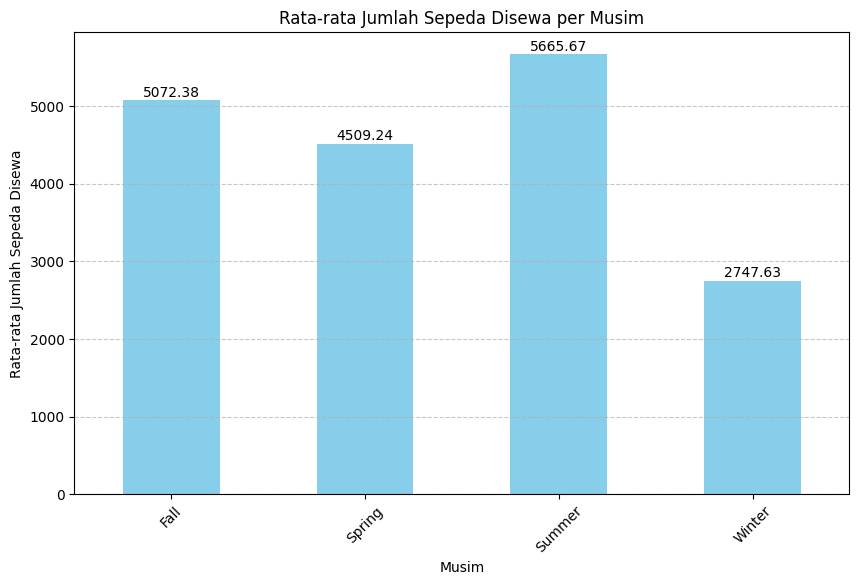

In [8]:
dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")

season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
dataset_day['season'] = dataset_day['mnth'].map(season_mapping)

average_bikes_rented_per_season = dataset_day.groupby('season')['cnt'].mean()
most_rented_season = average_bikes_rented_per_season.idxmax()
total_rented_bikes_in_most_rented_season = average_bikes_rented_per_season.max()

print("Musim dengan jumlah sepeda yang banyak disewa:", most_rented_season)
print("Jumlah sepeda yang disewa pada musim tersebut:", total_rented_bikes_in_most_rented_season)

plt.figure(figsize=(10, 6))
average_bikes_rented_per_season.plot(kind='bar', color='skyblue')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sepeda Disewa')
plt.title('Rata-rata Jumlah Sepeda Disewa per Musim')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(average_bikes_rented_per_season):
    plt.text(i, v + 10, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

plt.show()


### Pertanyaan Ketiga : Apa hubungan suhu dengan jumlah pengguna yang terdaftar?

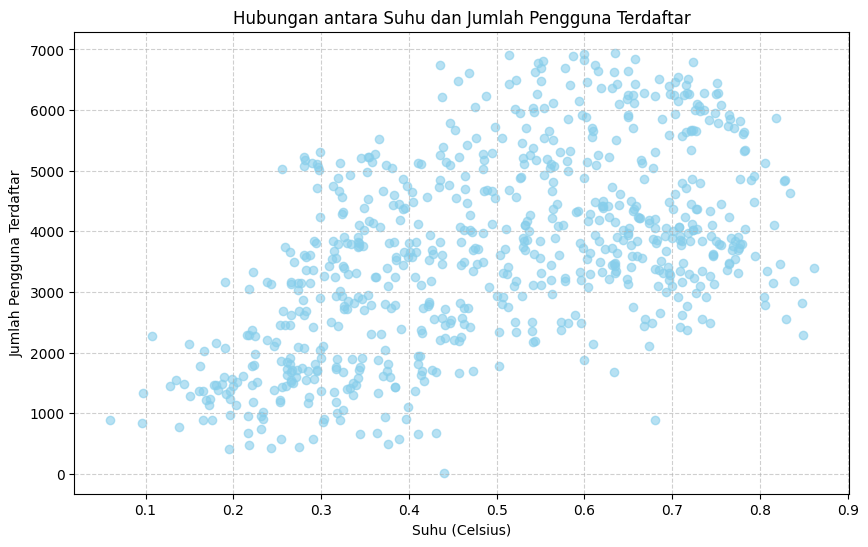

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
dataset_day = pd.read_csv("/content/drive/My Drive/datacsv/day.csv")

# Plot scatter plot untuk hubungan antara suhu (temp) dan jumlah pengguna terdaftar (registered)
plt.figure(figsize=(10, 6))
plt.scatter(dataset_day['temp'], dataset_day['registered'], color='skyblue', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Pengguna Terdaftar')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Semakin tinggi kenaikan suhu maka semakin tinggi juga jumlah pengguna yang terdaftar

## Conclusion

1. Berdasarkan grafik yang tertuju pada explanatory data analysis, jumlah penyewa sepeda di hari libur tahun 2011 berjumlah 30022

2. Pada hari kerja jumlah penyewa sepeda lebih banyak daripada hari libur dikarenakan banyak orang melakukan kegiatan diluar rumah, faktor ini sangat mempengaruhi kenaikan jumlah penyewa sepeda.

3. Berdasarkan dataset yang diperoleh, Musim sangat berpengaruh pada jumlah penyewaan sepeda, musim summer merupakan musim yang paling banyak penyewa sepedanya, dikarenakan musim ini cocok untuk berpergian menggunakan sepeda.

4. Berdasarkan data yang ada, semakin naik suhu maka semakin naik juga jumlah pendaftar yang tertera

Dari semua kesimpulan diatas, jumlah penyewa sepeda di setiap tahunnya mengalami kenaikan dan penurunan dikarenakan beberapa faktor, salah satunya yaitu faktor musim, musim yang terjadi diantaranya : musim summer, winter, fall, spring,  kegiatan di hari kerja dan hari libur, cuaca dan juga suhu.  